What is Explaratory Data Analysis?

EDA is used by data analyst/data engineering or data scientists  to analyze and investigate datasets for patterns , outlier and hypotheses based on our ubdertanding of dataset.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
file_path = '/content/Play Store Data.csv'
ps_df = pd.read_csv(file_path)
ps_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# finding the number of rows and column in the given dataset
print(ps_df.columns)
rows=(ps_df.shape[0])
columns=ps_df.shape[1]
print(f" the no of rowas is {rows} and no of coulmn is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
 the no of rowas is 10841 and no of coulmn is 13


In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Cleaning of data

Handling the NAN values in the play store data

In [ ]:
def playstoreinfo():
  temp=pd.DataFrame(index = ps_df.columns)
  temp["datatype"] = ps_df.dtypes
  temp["Not null values"] =ps_df.count()
  temp["Null values"]=ps_df.isnull().sum()
  temp["% of the null value"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp
playstoreinfo()

,datatype,Not null values,Null values,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


Rating has 1474 null values which contributes 13.6% of the data

In [ ]:
# the rows containg NAn values in the Android ver column
ps_df[ps_df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#finding the different values the 'Android ver' column take
ps_df["Android Ver"].value_counts()

,count
Android Ver,
4.1 and up,2451
4.0.3 and up,1501
4.0 and up,1375
Varies with device,1362
4.4 and up,980
2.3 and up,652
5.0 and up,601
4.2 and up,394
2.3.3 and up,281


In [ ]:
# dropping rows
ps_df=ps_df[ps_df['Android Ver'].notna()]
ps_df.shape


(10838, 13)

Current ver 8 null values

In [ ]:
ps_df[ps_df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# dropping rows
ps_df=ps_df[ps_df['Current Ver'].notna()]
ps_df.shape


(10830, 13)

Rating 1470 Nan values

In [ ]:
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
ps_df[(ps_df['Rating']<1) | (ps_df['Rating'] > 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


1 Mean (Average)

Sum of all values / total number of values


median (middle number )

mode ----

In [ ]:
# finding mean and meadium in the rating column excluding the Nan values

mean_rating=round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)
medium_rating=ps_df[~ps_df['Rating'].isnull()]['Rating'].median()
[mean_rating , medium_rating ]



[np.float64(4.1918), 4.3]

In [ ]:
#replacing the Nan values in the 'rating' column with mediam
ps_df['Rating'].fillna(value=medium_rating,inplace= True)

<ipython-input-23-2fbd010488b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ps_df['Rating'].fillna(value=medium_rating,inplace= True)


In [ ]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df['App'].value_counts()

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
Candy Crush Saga,7
Duolingo: Learn Languages Free,7
8 Ball Pool,7
...,...
FR Tides,1
payermonstationnement.fr,1
News Minecraft.fr,1


In [ ]:
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [ ]:
# converting the datatype of the valuess in the review from strng to int

ps_df['Reviews'] = ps_df['Reviews'].astype(int)
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df.describe()

,Rating,Reviews
count,10830.000000,1.083000e+04
mean,4.206519,4.445607e+05
std,0.480446,2.929081e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.300000,2.099500e+03
75%,4.500000,5.481300e+04
max,5.000000,7.815831e+07


Let us see what insight we can have on the basis of Size of an app

Size vs Rating

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

ValueError: could not convert string to float: '19M'

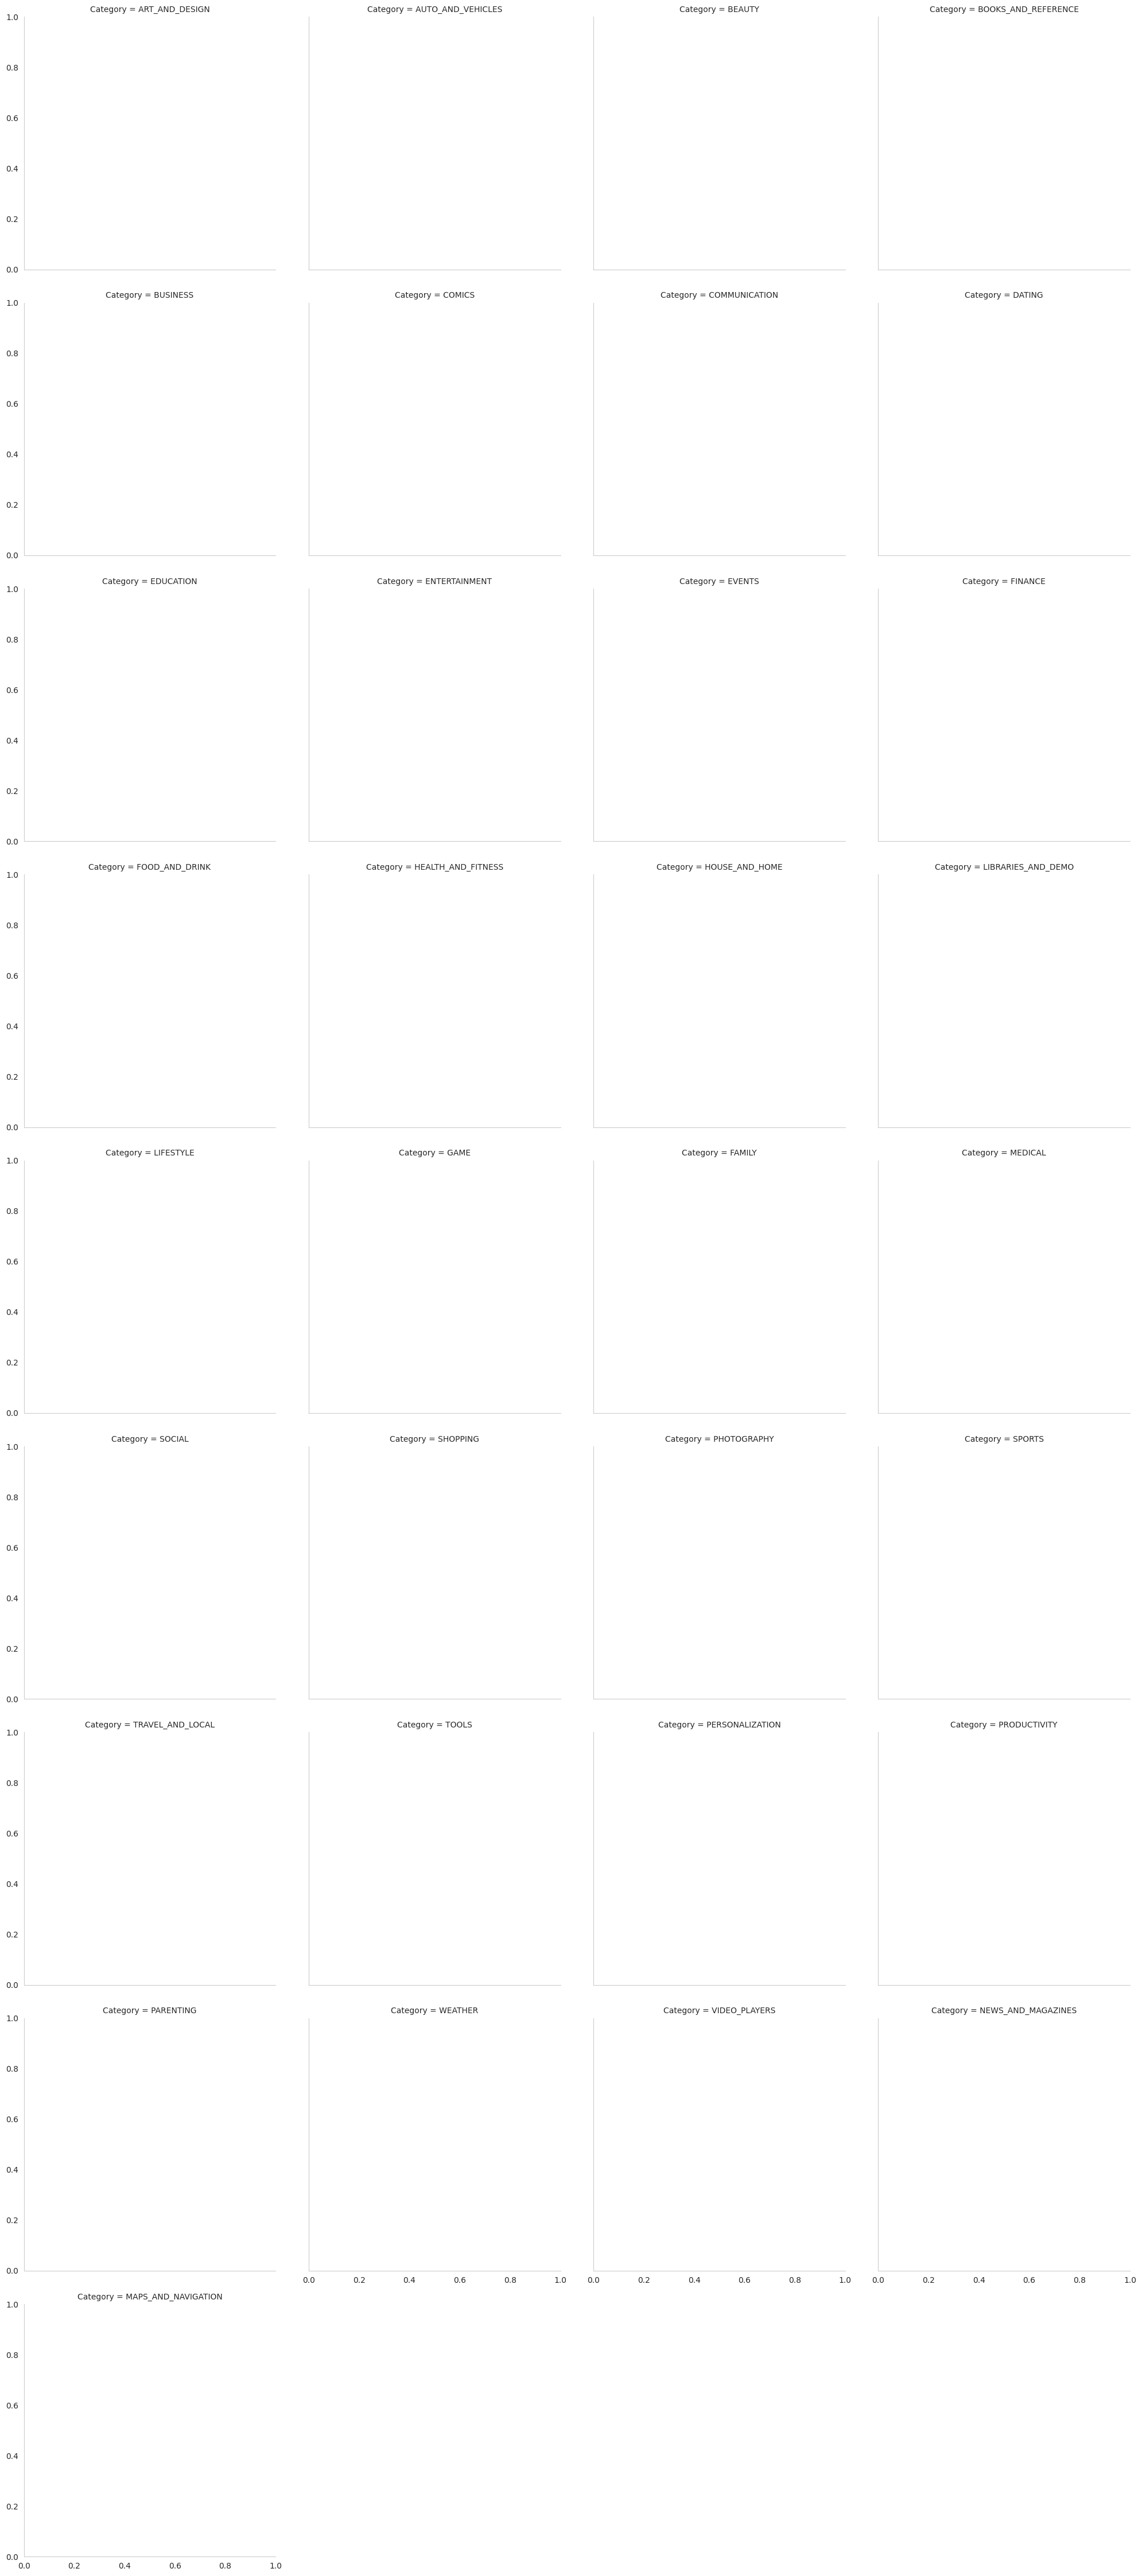

In [ ]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.lmplot(y='Rating', x='Size', data=ps_df, col="Category", hue="Category", col_wrap=4, line_kws={'color': 'red'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
File_path='/content/User Reviews.csv'
ur_df = pd.read_csv(File_path)
ur_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# finding the number of rows and column in the given dataset
print(ur_df.columns)
rows=(ur_df.shape[0])
columns=ur_df.shape[1]
print(f" the no of rowas is {rows} and no of coulmn is {columns}")

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
 the no of rowas is 64295 and no of coulmn is 5


What is the ratio of number of Paid apps and free app?

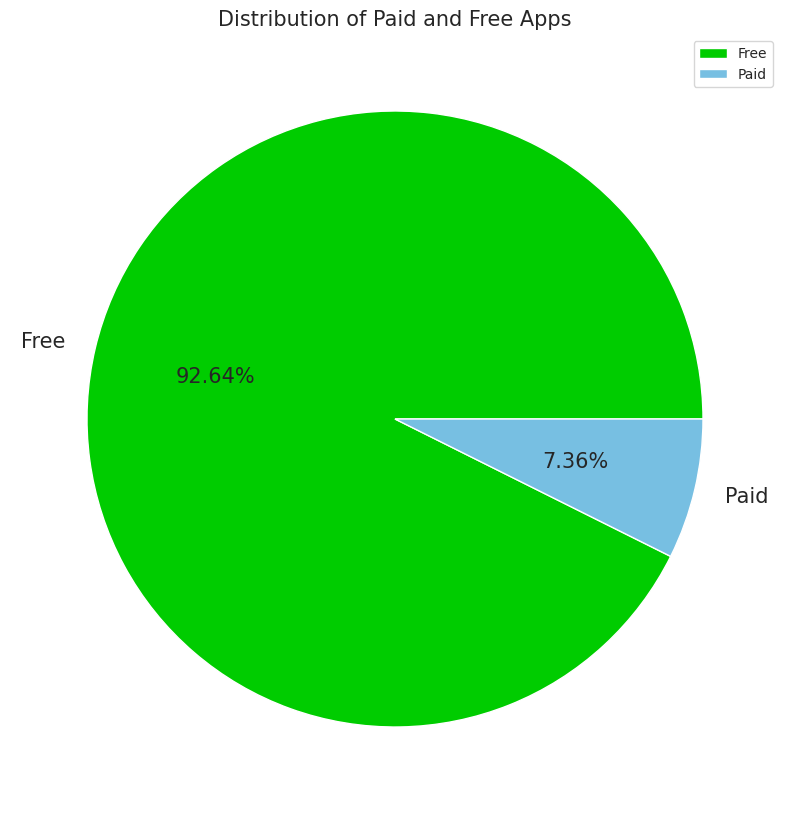

In [ ]:
data = ps_df['Type'].value_counts()
labels = ['Free', 'Paid']

# Create pie chart
plt.figure(figsize=(10, 10))
colors = ["#00cc00", "#77BFE2"]
plt.pie(data, labels=labels, colors=colors, autopct='%.2f%%', textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free Apps', size=15, loc='center')
plt.legend()

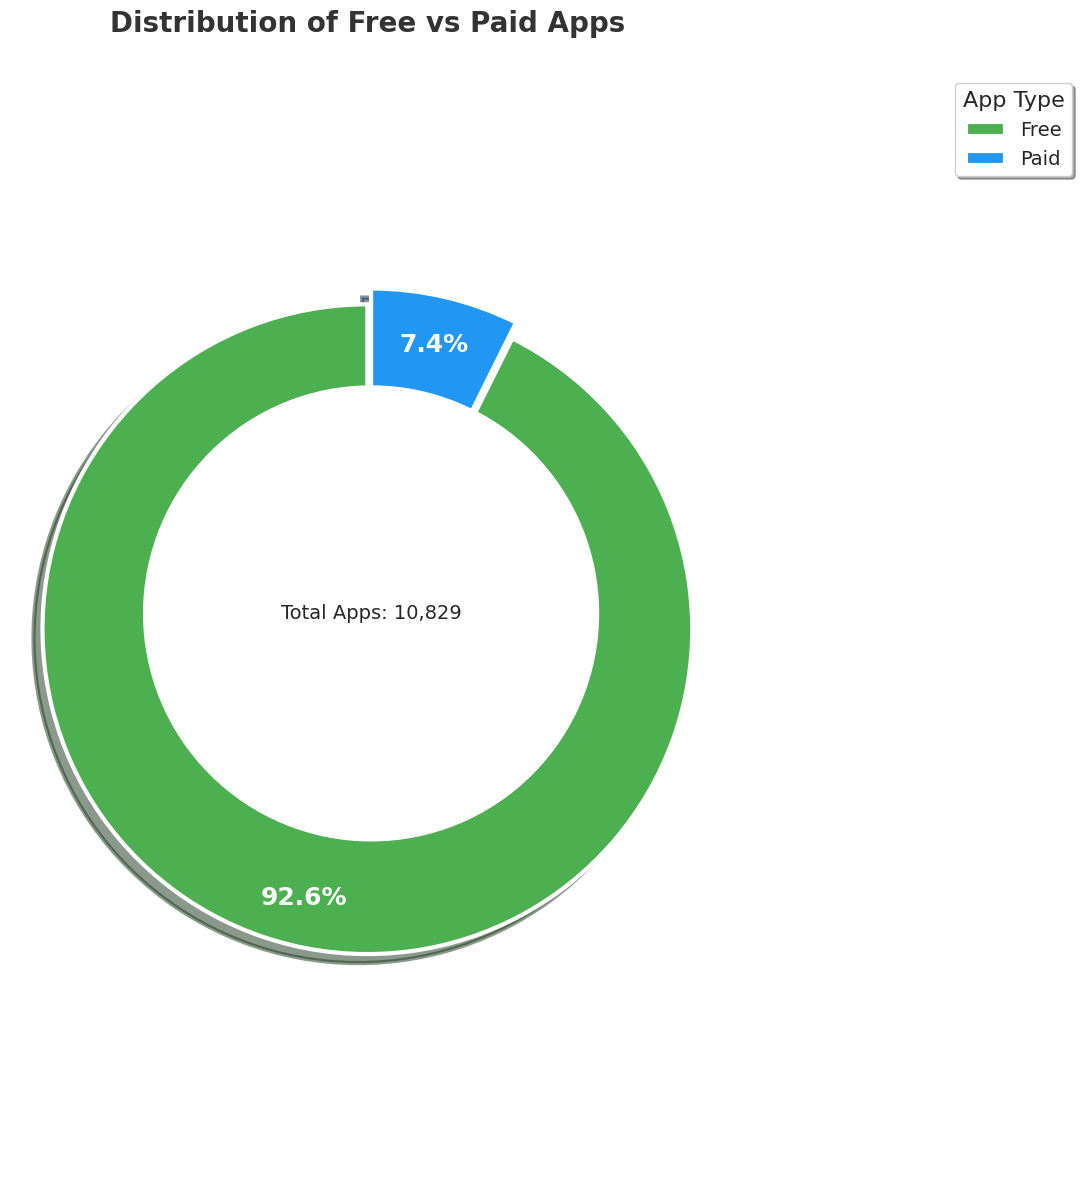

In [ ]:
# Prepare data
data = ps_df['Type'].value_counts()
labels = ['Free', 'Paid']
colors = ["#4CAF50", "#2196F3"]  # More vibrant colors
explode = (0.05, 0)  # Slight separation for the Free slice

# Create stylish pie chart
plt.figure(figsize=(12, 12), facecolor='white')

# Create pie with effects
wedges, texts, autotexts = plt.pie(
    data,
    labels=labels,
    colors=colors,
    autopct='%.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,  # Add shadow effect
    textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'white'},
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    pctdistance=0.85  # Move percentages inside
)

# Make percentages bigger and bolder
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(18)
    autotext.set_fontweight('bold')

# Add white circle in center (donut style)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')

# Add title with custom styling
plt.title(
    'Distribution of Free vs Paid Apps',
    size=20,
    pad=30,
    fontweight='bold',
    color='#333333'
)

# Add legend with shadow
legend = plt.legend(
    title="App Type",
    loc="upper right",
    bbox_to_anchor=(1, 0, 0.5, 1),
    shadow=True,
    prop={'size': 14}
)
legend.get_title().set_fontsize(16)

# Add annotation for total count
total = sum(data)
plt.annotate(
    f'Total Apps: {total:,}',
    xy=(0, 0),
    ha='center',
    va='center',
    fontsize=14,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

Which category of app from the rating column are found more on playstore

<ipython-input-56-e0a3ddf69246>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.values, y=labels, palette="viridis", edgecolor="black")


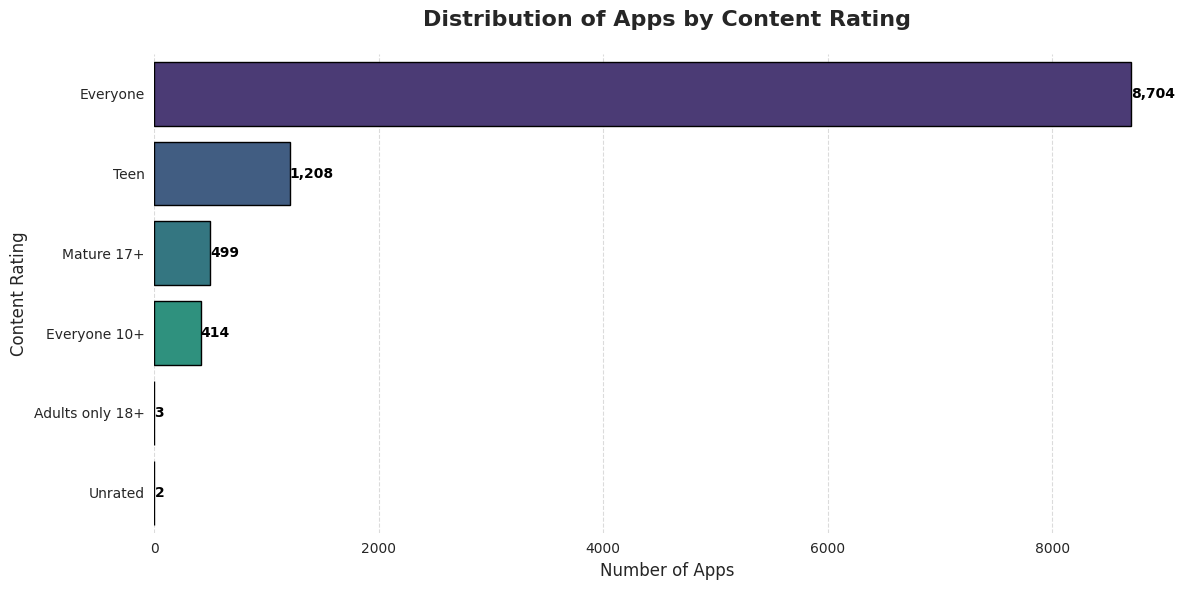

In [ ]:
# Get value counts and prepare data
data = ps_df['Content Rating'].value_counts()
labels = data.index.tolist()

# Create stylish bar plot (better than pie for many categories)
plt.figure(figsize=(12, 6), facecolor='white')
ax = sns.barplot(x=data.values, y=labels, palette="viridis", edgecolor="black")

# Add value labels
for i, v in enumerate(data.values):
    ax.text(v + 0.2, i, f"{v:,}", color='black', va='center', fontweight='bold')

# Customize appearance
plt.title("Distribution of Apps by Content Rating", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Number of Apps", fontsize=12)
plt.ylabel("Content Rating", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Top category on google playstore

<ipython-input-57-5da31a91c623>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


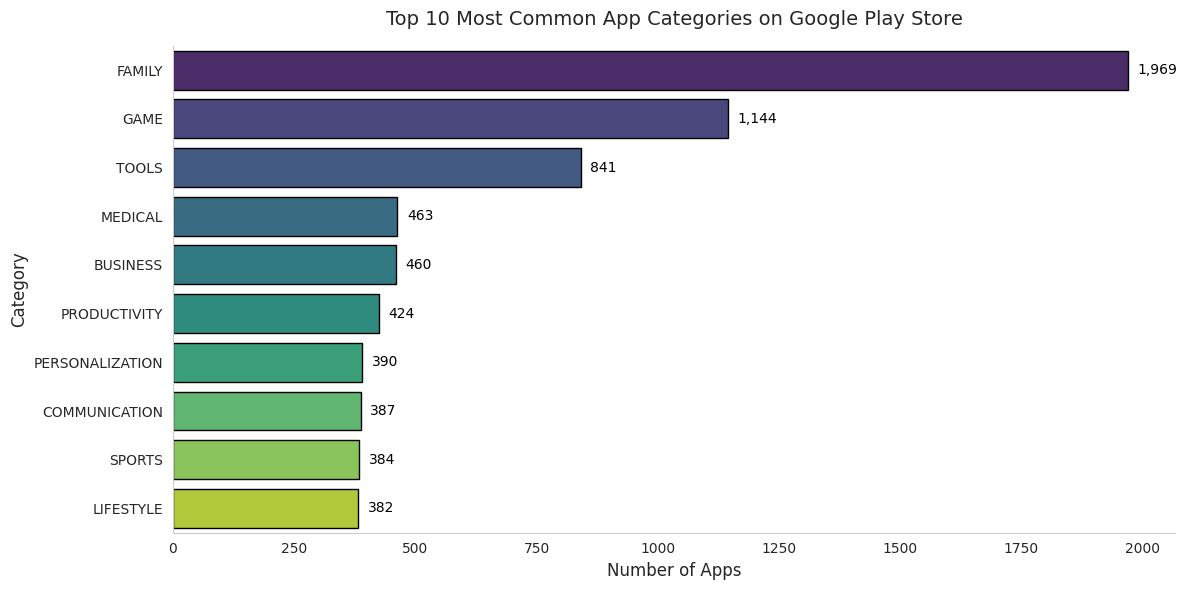

In [ ]:
# Get top 10 categories
top_categories = ps_df['Category'].value_counts().head(10)

# Plot (Bar Chart - Best for Comparisons)
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_categories.values,
    y=top_categories.index,
    palette="viridis",
    edgecolor="black"
)

# Add value labels
for i, v in enumerate(top_categories.values):
    plt.text(v + 20, i, f"{v:,}", color='black', ha='left', va='center')

# Formatting
plt.title("Top 10 Most Common App Categories on Google Play Store", fontsize=14, pad=15)
plt.xlabel("Number of Apps", fontsize=12)
plt.ylabel("Category", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

which category app have most number of install?

Average Rating

Average app rating

what are the top 10 installed app in any category

Top app that are of free type

top apps that are of paid type

Distribution of app based on its size

Andriod version based on each category

app with the higest number of positive reviews

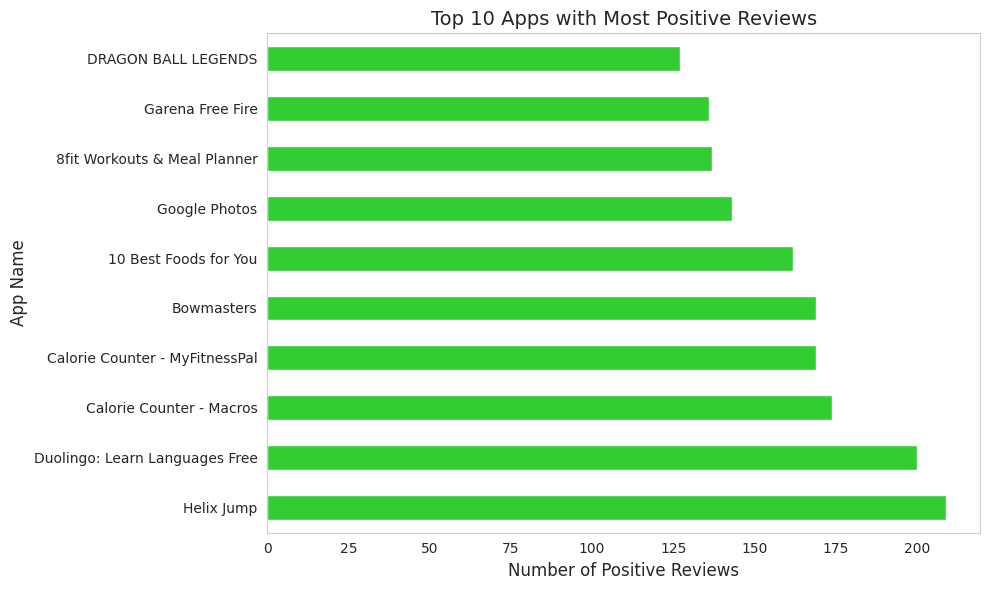

In [ ]:
import matplotlib.pyplot as plt

# Count of positive reviews by App
positive['App'].value_counts().head(10).plot(kind='barh', color='limegreen', figsize=(10, 6))

plt.xlabel('Number of Positive Reviews', fontsize=12)
plt.ylabel('App Name', fontsize=12)
plt.title('Top 10 Apps with Most Positive Reviews', fontsize=14)
plt.tight_layout()
plt.show()


app with the higest number of negative reviews

Paid App content rating

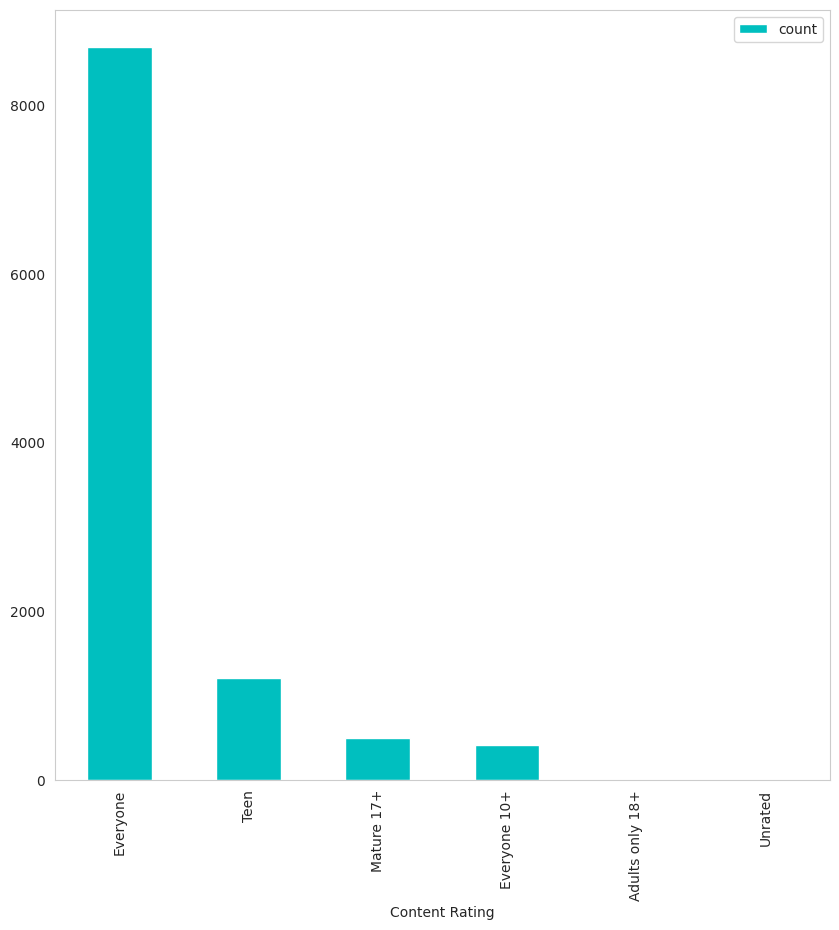

In [ ]:
ps_df['Content Rating'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

Free app